<font size="10">Import Data and Summary Statistics</font>

In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

#importing the data and performing summary statistics
hour = pd.read_csv('hour.csv')
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [2]:
#Calculating the mean
print(hour.loc[(hour['hr']<5) & (hour['temp']<.5),'count'].mean())
print(hour.loc[(hour['hr']<5) & (hour['temp']>.5),'count'].mean())
print(hour.loc[(hour['temp']>.5) | (hour['hum']>.5),'count'].mean())

19.521104742053154
33.639322916666664
193.36764103264582


<font size="10">Visualizing Data with Matplotlib</font>

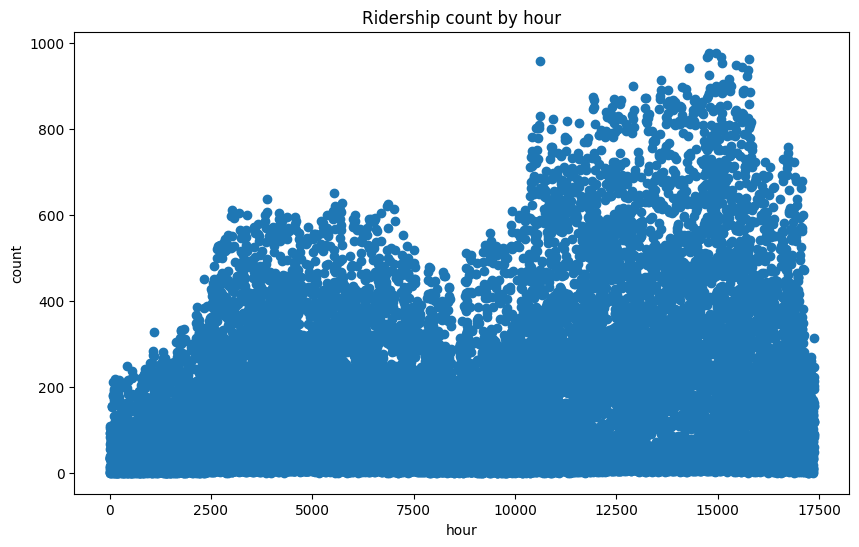

In [3]:
#ridership by the hour
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour['instant'],y = hour['count'])
plt.xlabel("hour")
plt.ylabel("count")
plt.title("Ridership count by hour")
plt.show()

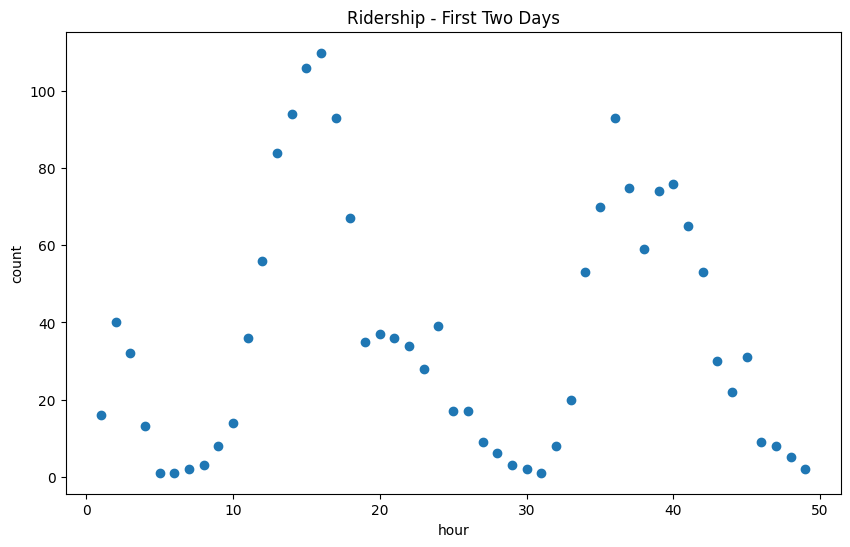

In [4]:
#the first 48 hours 
hour_first48 = hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour_first48['instant'],y = hour_first48['count'])
plt.xlabel("hour")
plt.ylabel("count")
plt.title("Ridership - First Two Days")
plt.show()

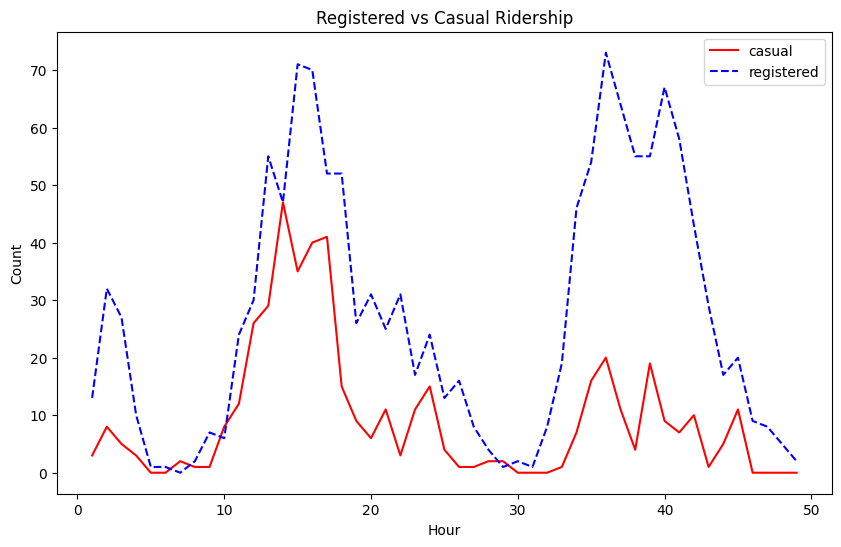

In [5]:
#number of casual riders vs registered riders
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hour_first48['instant'],hour_first48['casual'],c='red',label='casual',linestyle = '-')
ax.plot(hour_first48['instant'],hour_first48['registered'],c='blue',label='registered',linestyle = '--')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Registered vs Casual Ridership')
ax.legend()
plt.show()

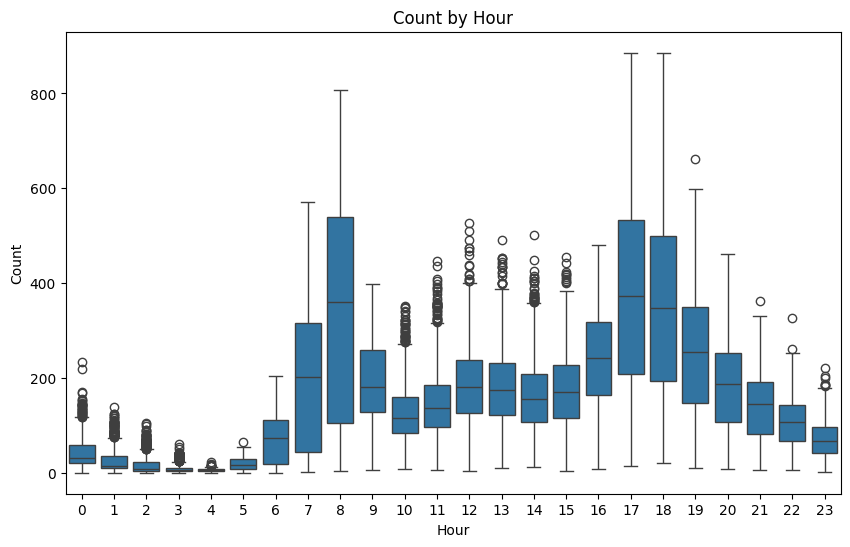

In [6]:
#registered users by the hour
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='hr',y='registered',data = hour)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count by Hour')
plt.show()

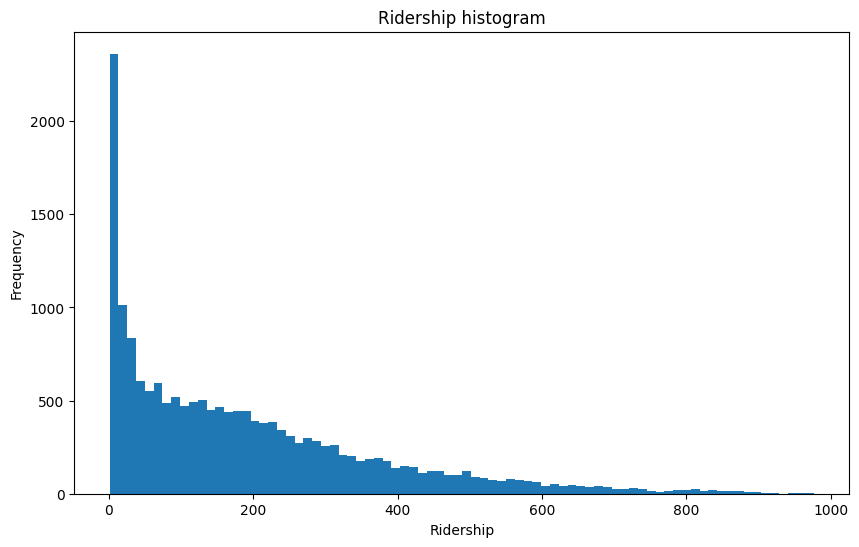

In [7]:
#histogram of riders
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(hour['count'],bins=80)
plt.xlabel('Ridership')
plt.ylabel('Frequency')
plt.title("Ridership histogram")
plt.show()

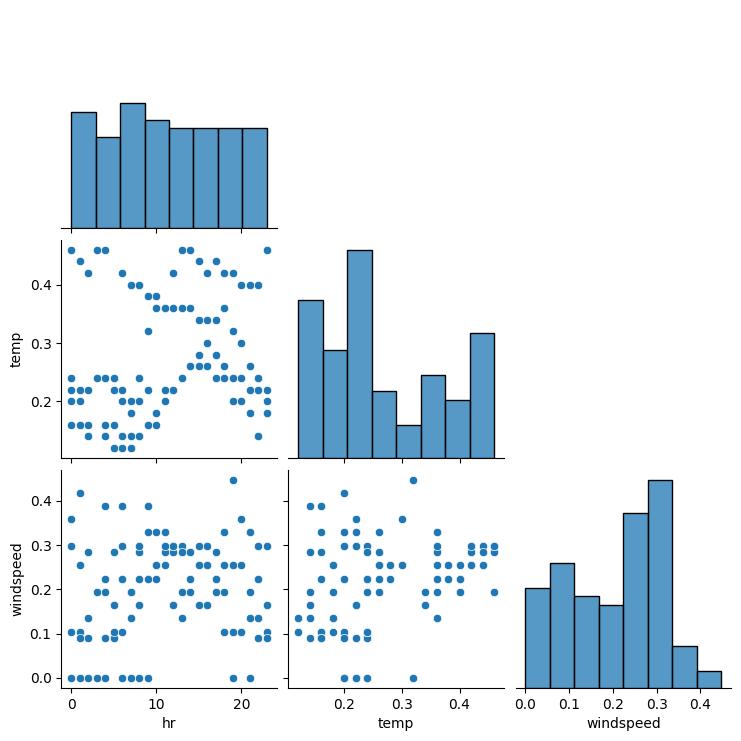

In [8]:
#looking at 3 variables for the first 100 hours
thevariables = ['hr','temp','windspeed']
hour_first100 = hour.loc[0:100,thevariables]
sns.pairplot(hour_first100,corner = True)
plt.show()

<font size="10">Finding Correlations Between Variables</font>

In [9]:
#finding the correlation matrix
thenames = ['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


<font size="10">Creating a Heat Map</font>

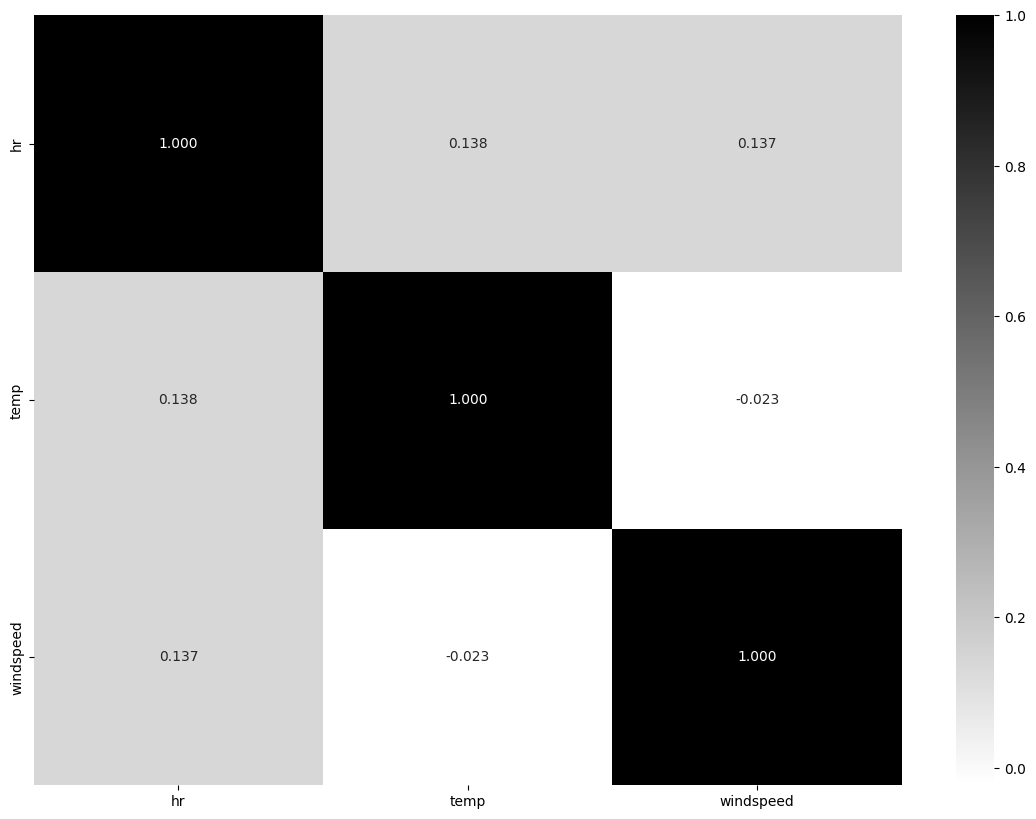

In [11]:
#Making a heat map
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',fmt=".3f",xticklabels=thenames,yticklabels=thenames)
plt.show()

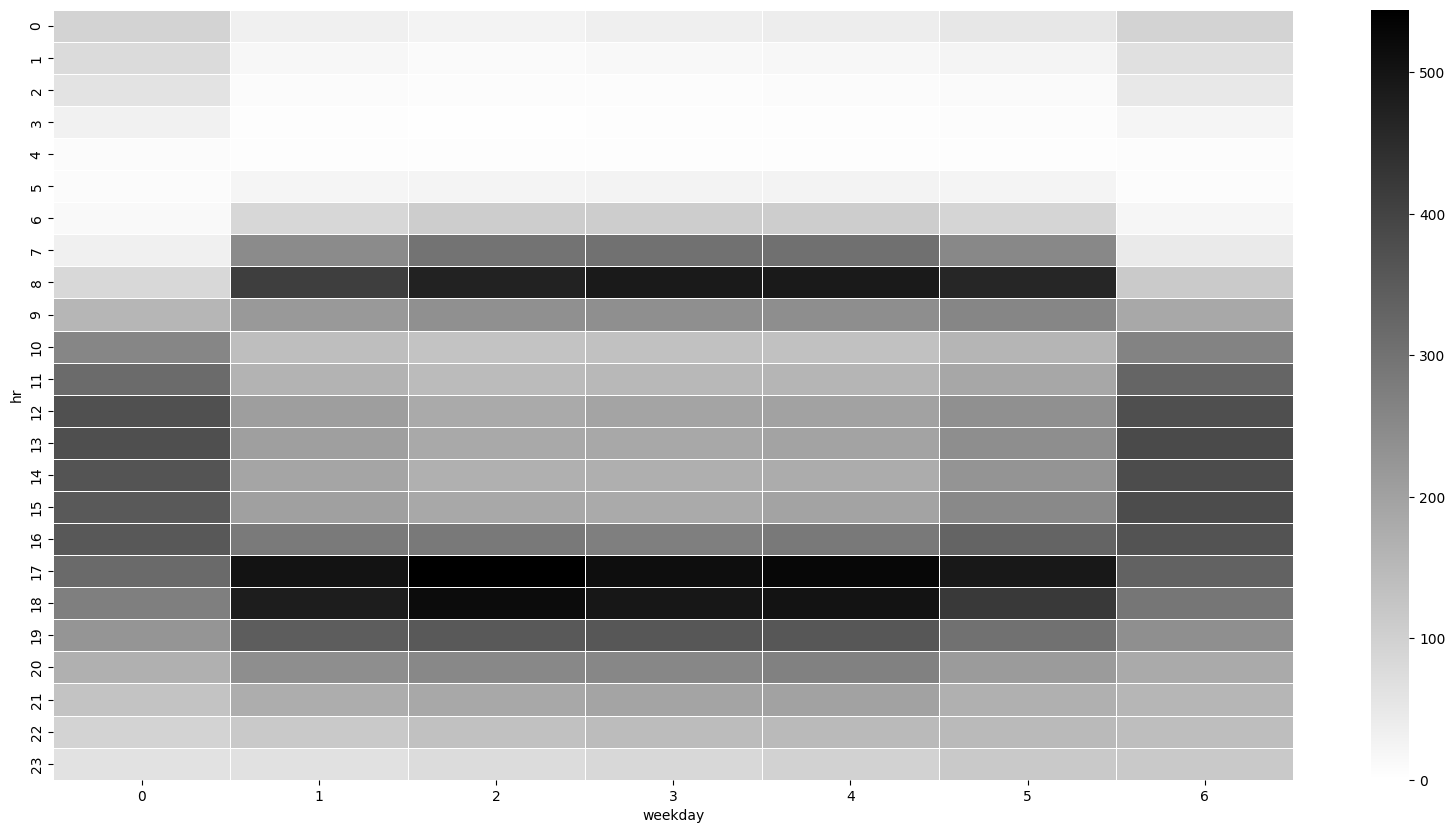

In [12]:
#making a pivot table
df_hm = hour.pivot_table(index = 'hr',columns='weekday',values='count')
plt.figure(figsize=(20,10))
#creating a heat map
sns.heatmap(df_hm,fmt = 'd',cmap='binary',linewidth=.5,vmin = 0)
plt.show()